In [29]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [17]:
#read the data from csv file
nba = pd.read_csv("D:\\Study\\DataScience\\DataSets\\nba_2013.csv")

In [18]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [19]:
#to know the columns names
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [21]:
#Let check any columns contraining invalida data or not
nba.isnull().any().any(), nba.shape

(True, (481, 31))

In [22]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [23]:
#now find how many data points in each column are null.
nba.isnull().sum(axis=0)

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

## It is clear that column 'fg.', 'x3p.', 'x2p.', 'efg.', 'ft.' have null values

In [24]:
#drop all invalid data/replace with some other data
nba.fillna(0, inplace=True)

In [25]:
#again checking is there any invalid data present in the data set
nba.isnull().any().any(), nba.shape

(False, (481, 31))

## Get Basic Statistical Information

In [26]:
print(nba.describe())

              age           g          gs           mp          fg  \
count  481.000000  481.000000  481.000000   481.000000  481.000000   
mean    26.509356   53.253638   25.571726  1237.386694  192.881497   
std      4.198265   25.322711   29.658465   897.258840  171.832793   
min     19.000000    1.000000    0.000000     1.000000    0.000000   
25%     23.000000   32.000000    0.000000   388.000000   47.000000   
50%     26.000000   61.000000   10.000000  1141.000000  146.000000   
75%     29.000000   76.000000   54.000000  2016.000000  307.000000   
max     39.000000   83.000000   82.000000  3122.000000  849.000000   

               fga         fg.         x3p        x3pa        x3p.  \
count   481.000000  481.000000  481.000000  481.000000  481.000000   
mean    424.463617    0.434622   39.613306  110.130977    0.245397   
std     368.850833    0.102401   50.855639  132.751732    0.176482   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%     110.000000 

In [27]:
# Store the numerical and categorical columns list

num_cols = nba.select_dtypes(exclude = ['object']).columns.values
cat_cols = nba.select_dtypes(include = ['object']).columns.values
num_cols, cat_cols

(array(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
        'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
        'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'season_end'],
       dtype=object),
 array(['player', 'pos', 'bref_team_id', 'season'], dtype=object))

## Visualization:individual Numerical Columns vs pts

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


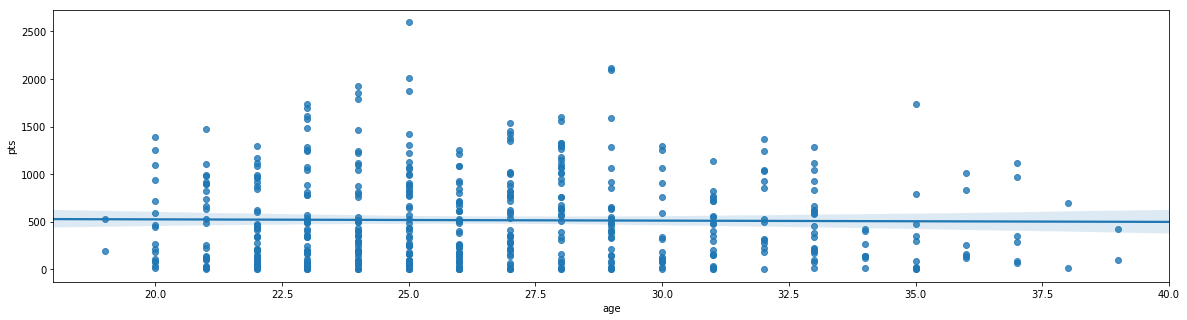

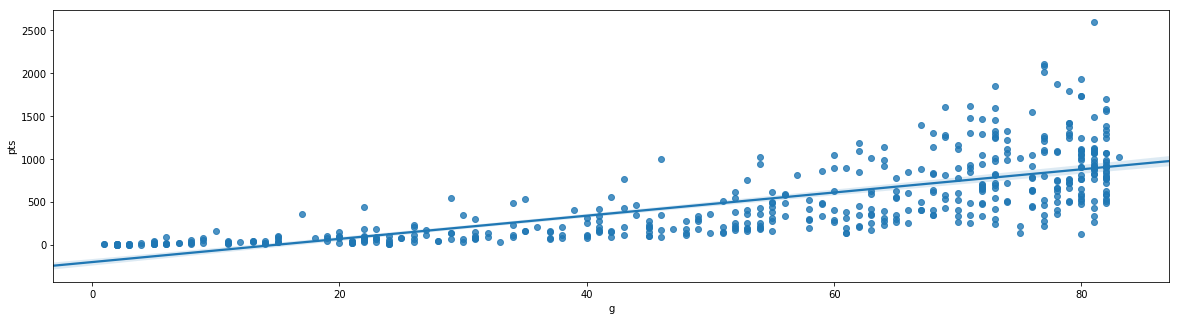

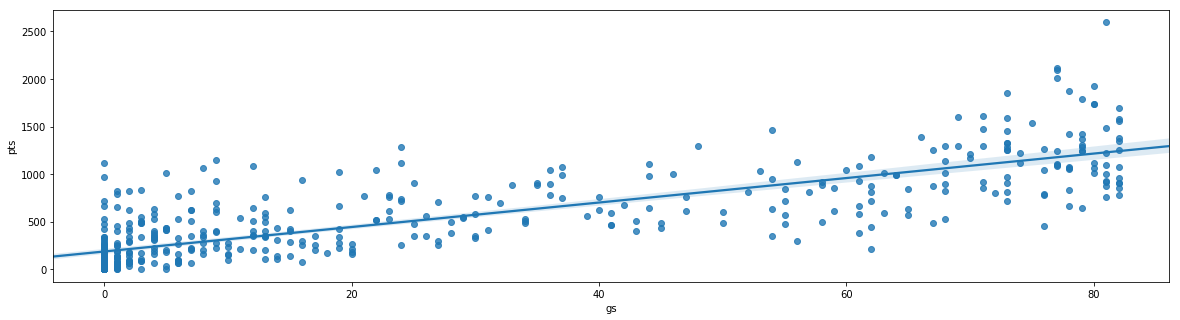

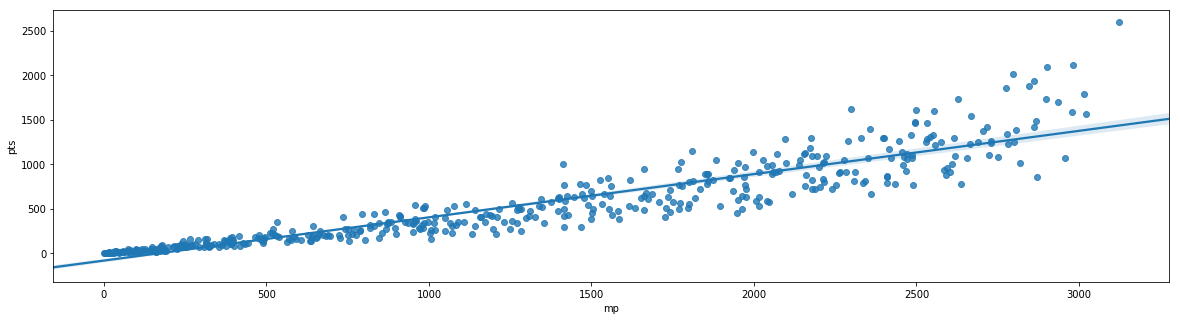

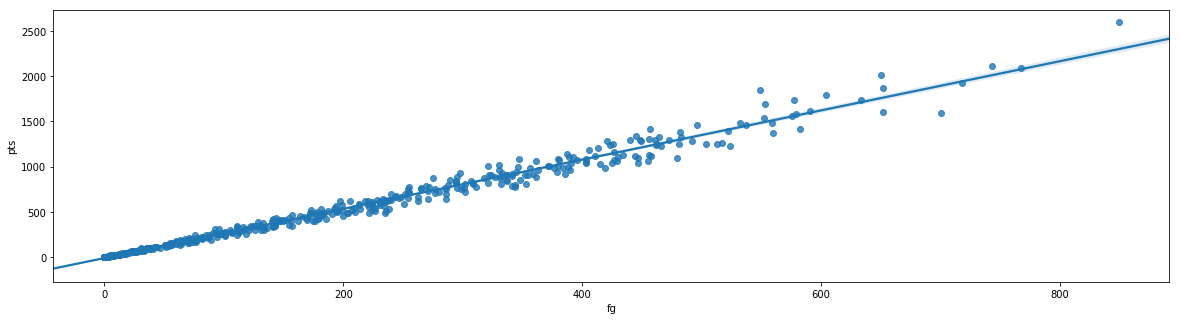

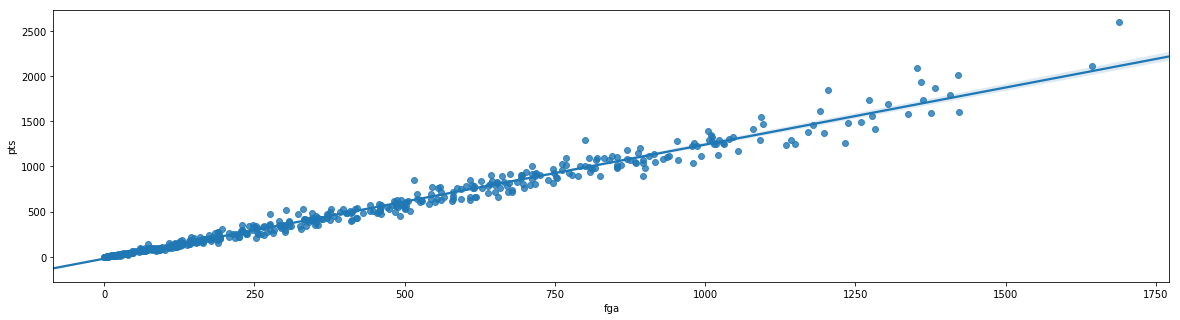

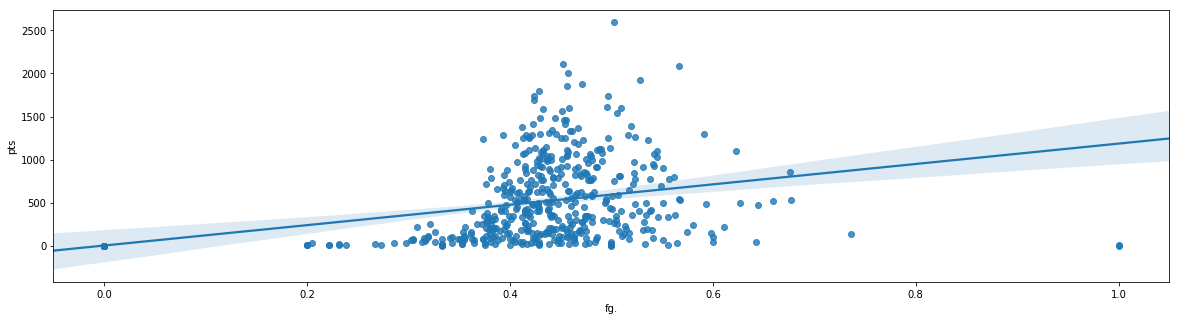

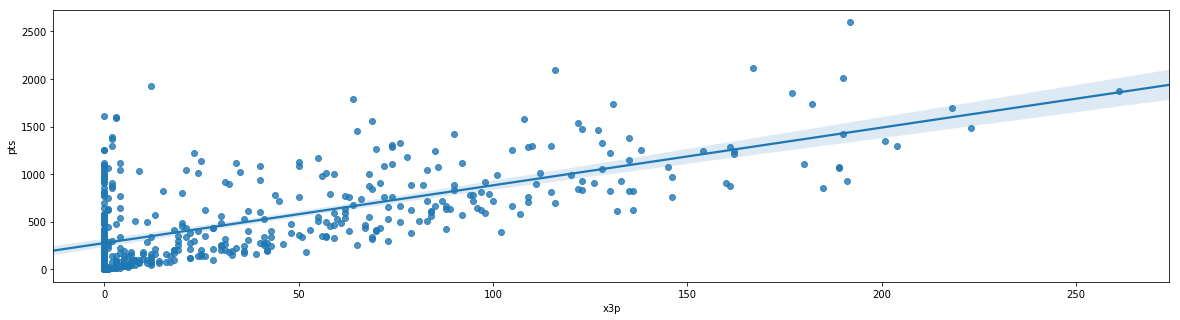

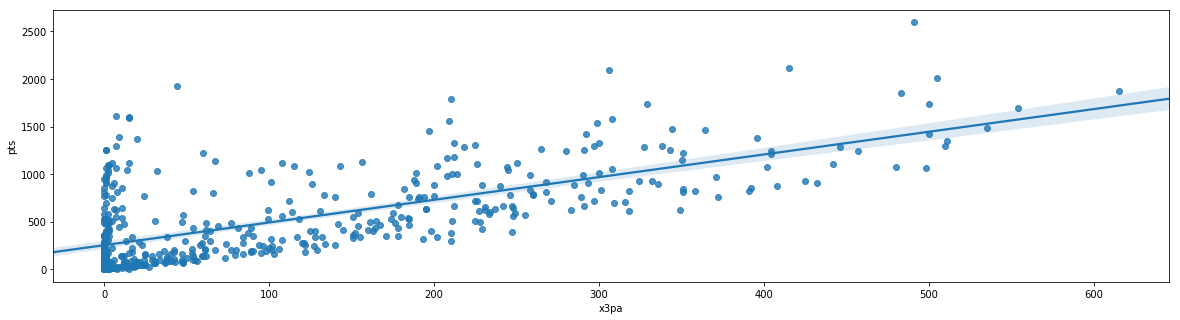

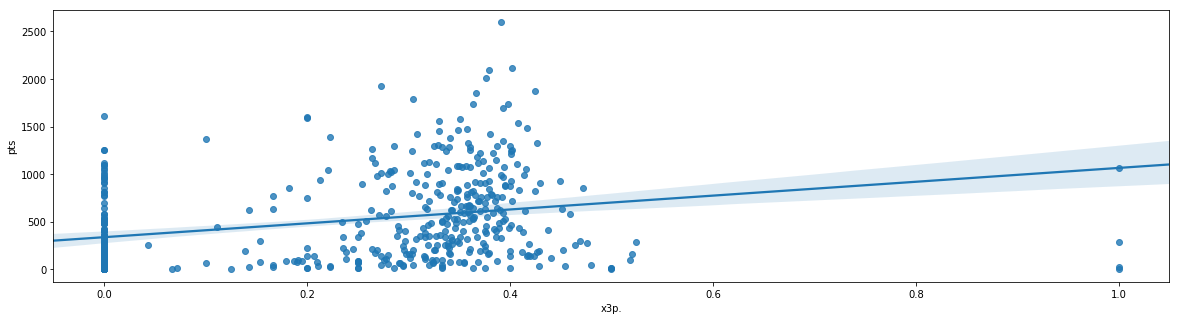

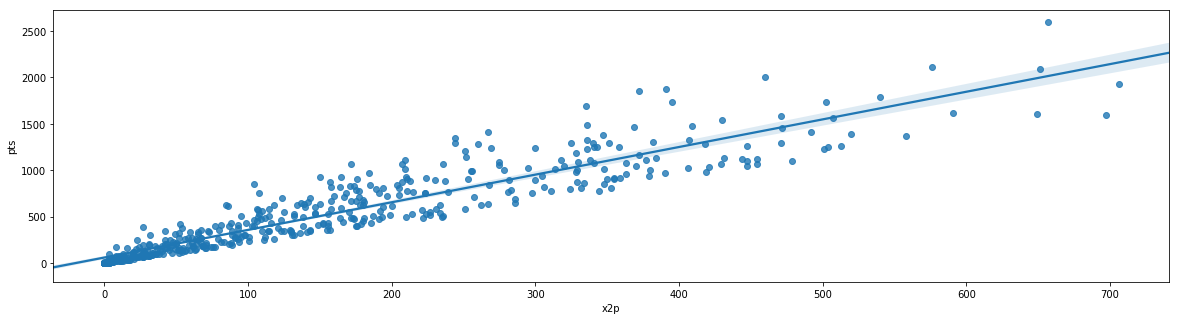

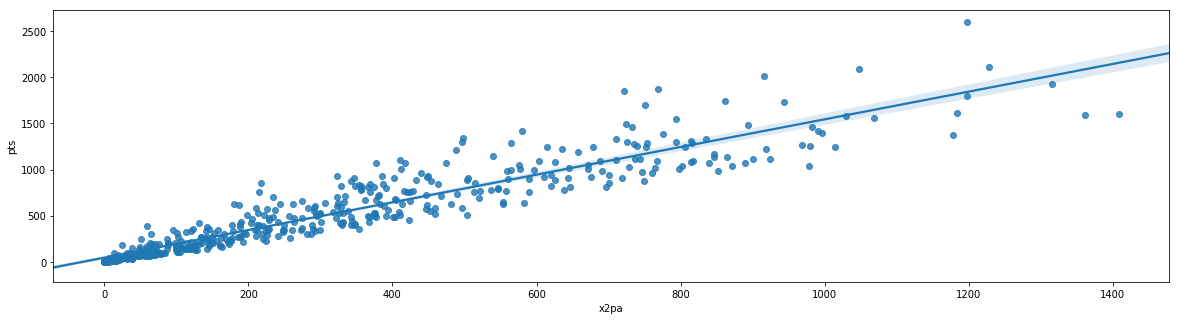

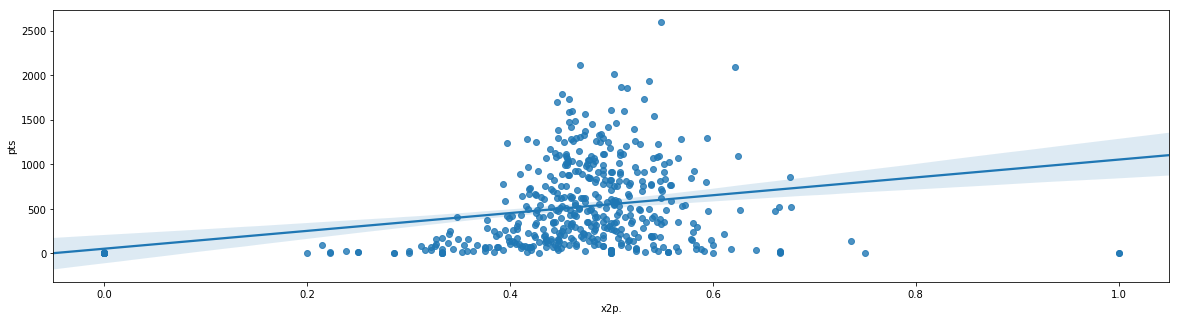

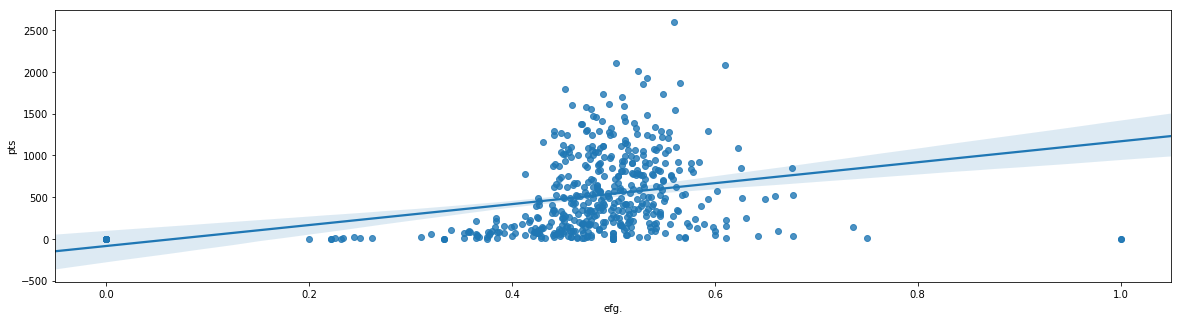

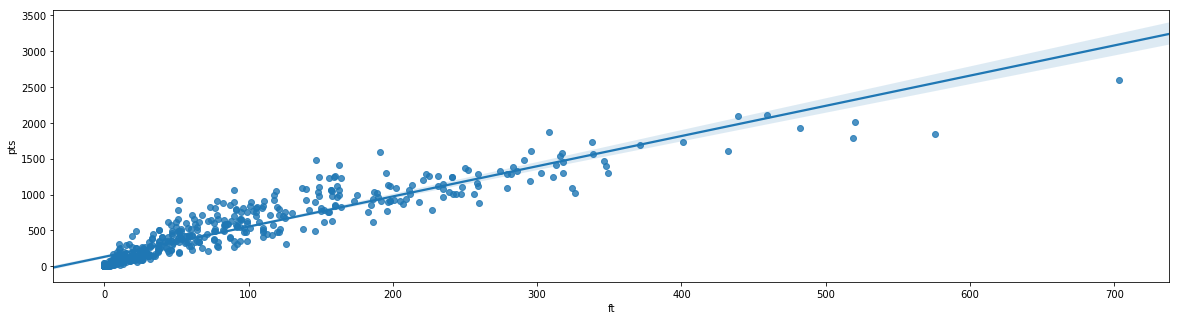

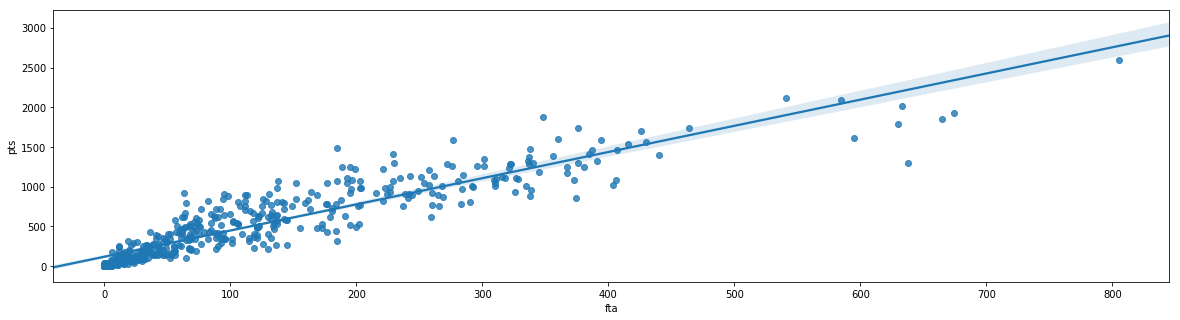

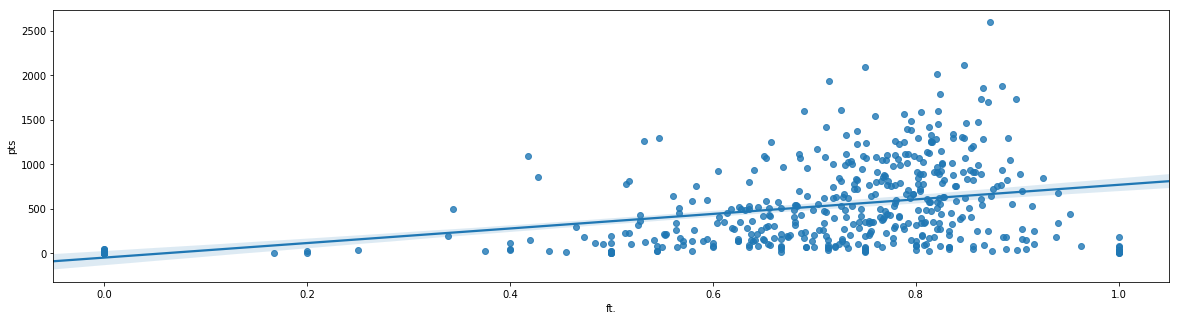

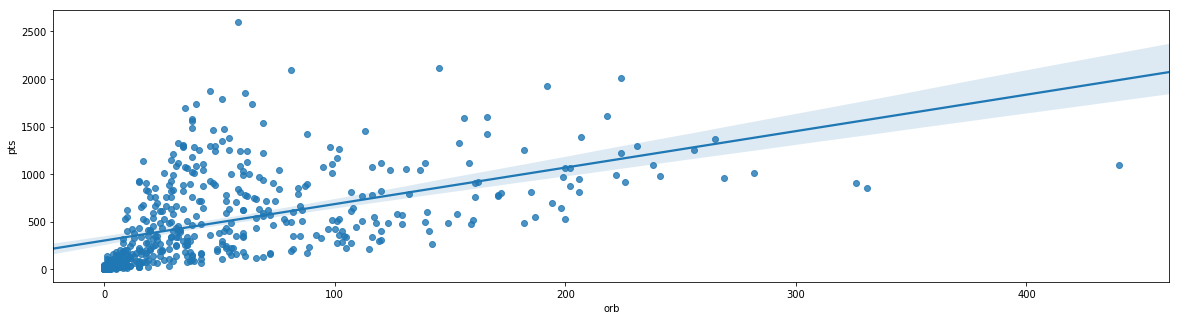

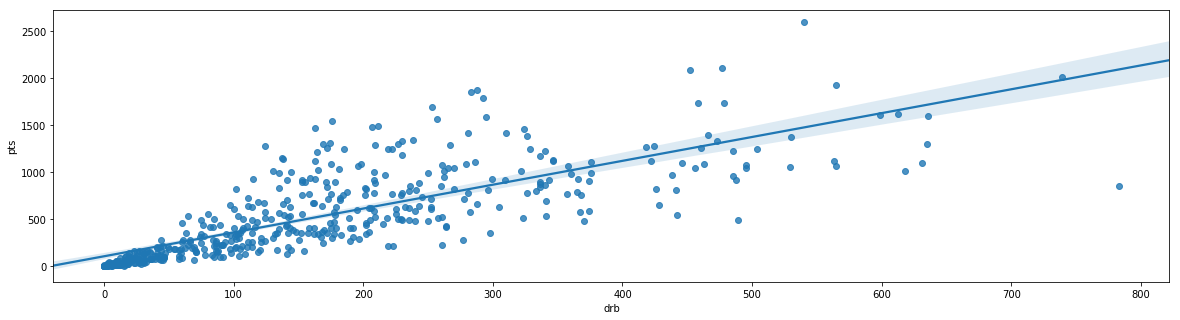

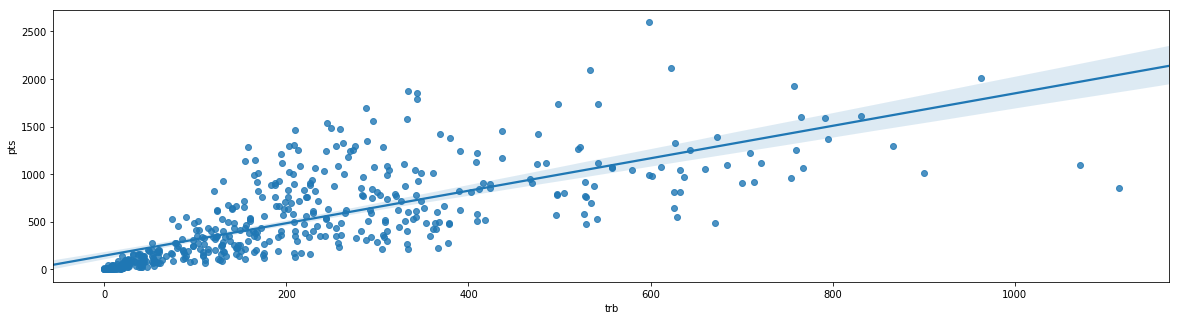

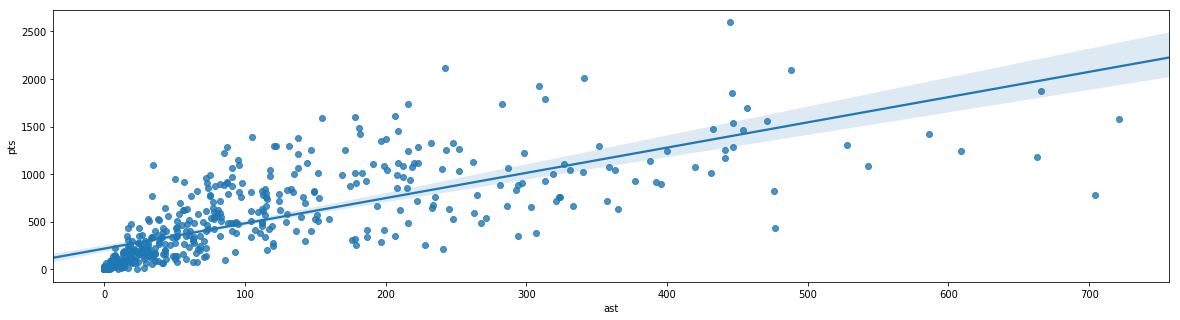

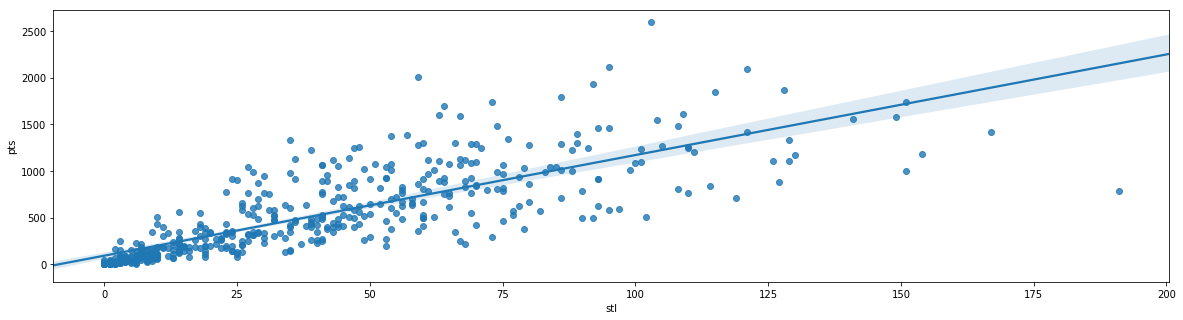

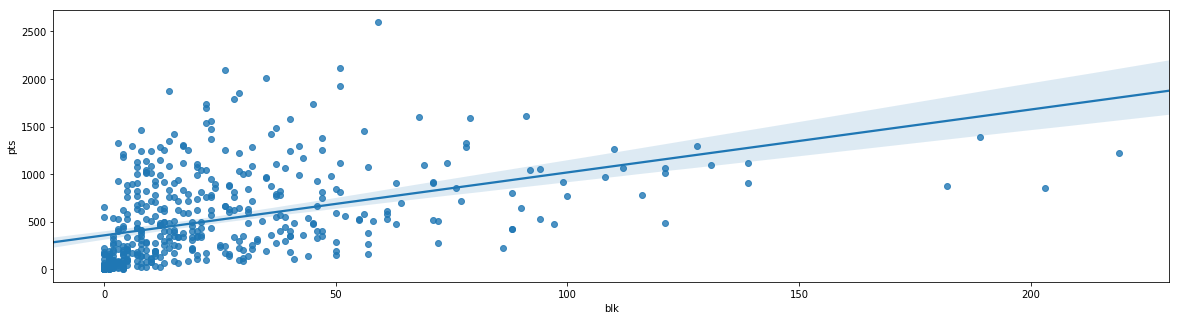

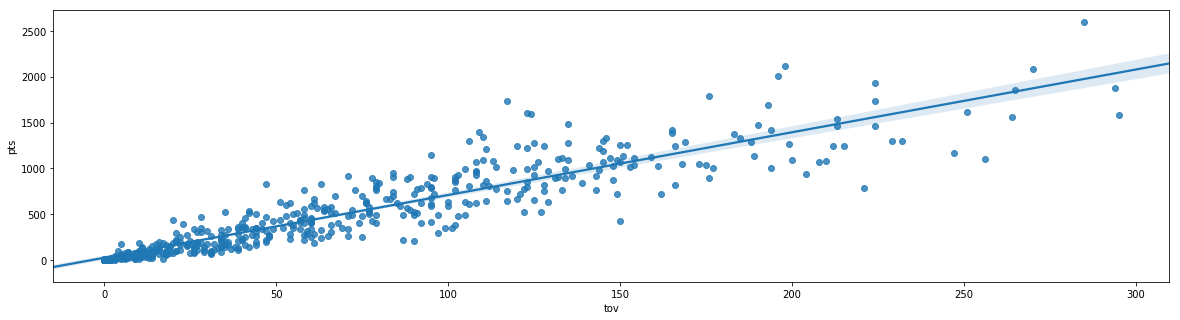

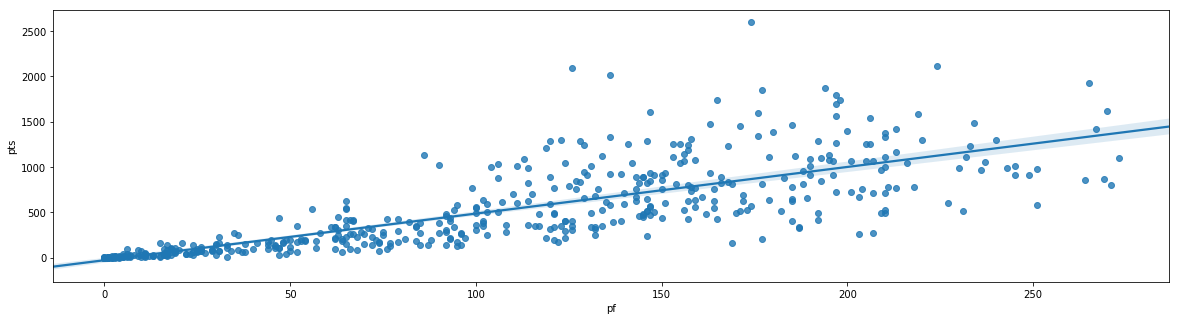

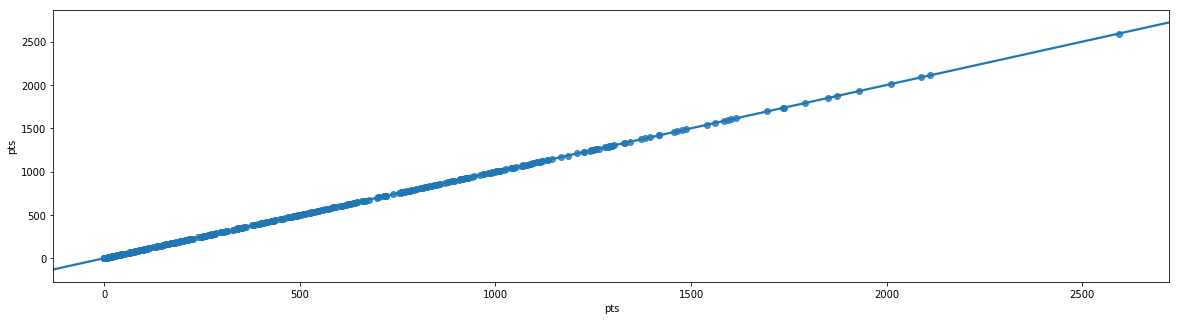

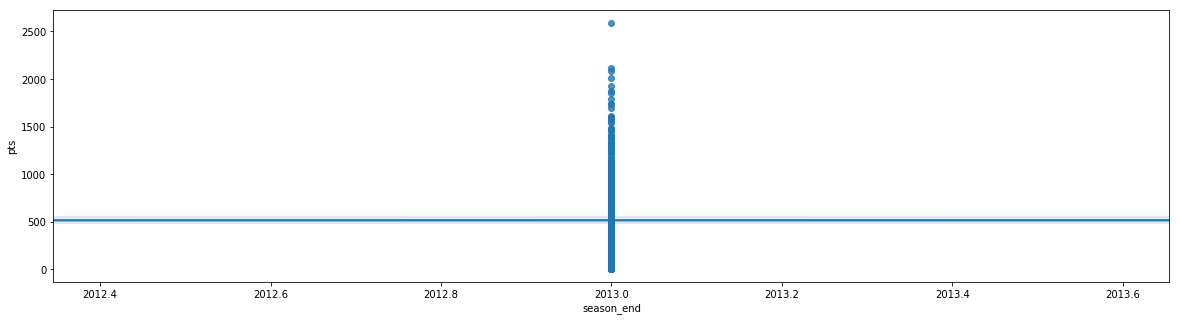

In [30]:
for i, col in enumerate(num_cols):
    plt.figure(i,figsize = (20,5))
    sns.regplot(x = col, y = 'pts', data = nba)

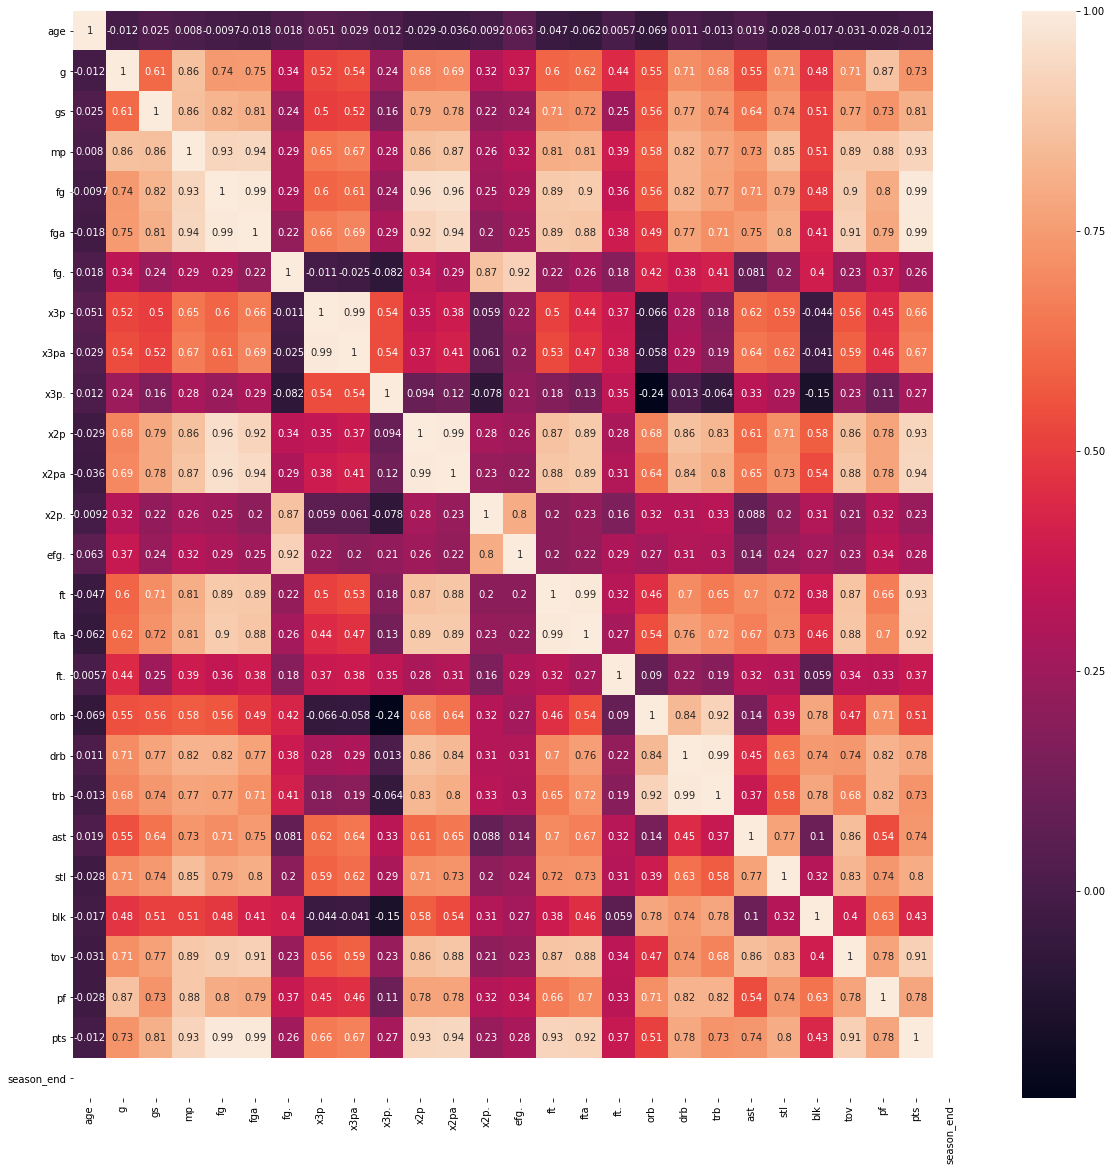

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(nba.corr(), annot= True)

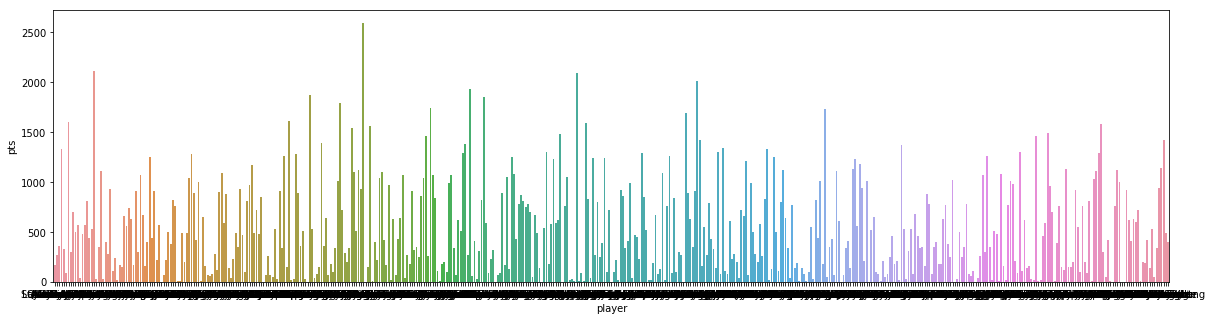

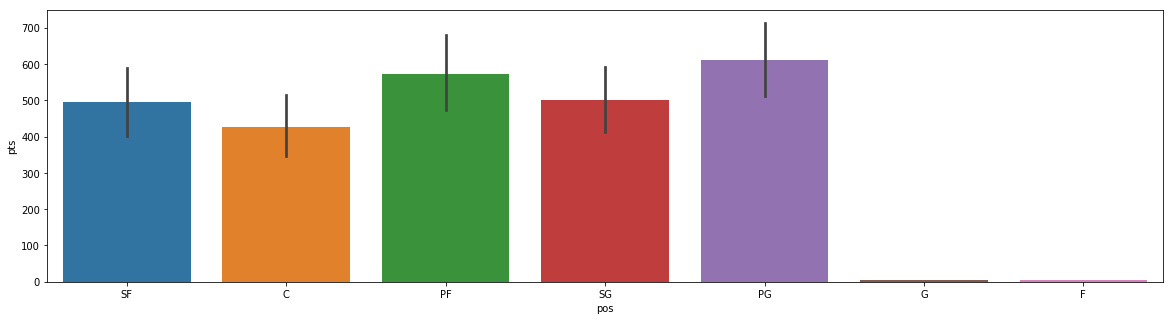

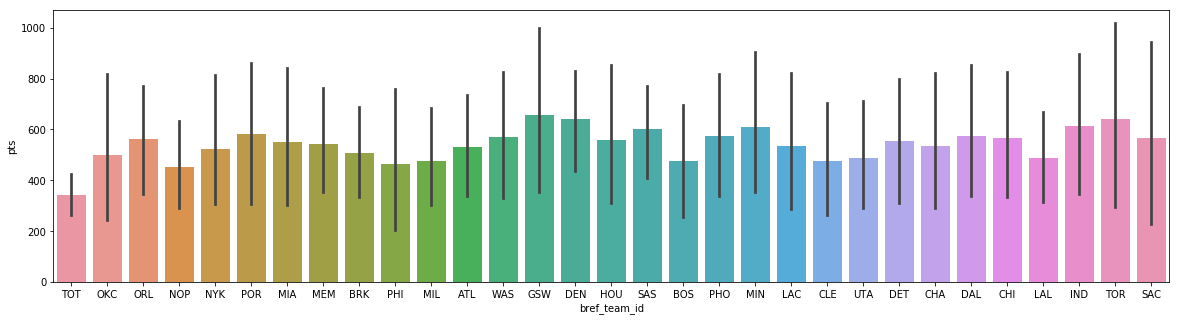

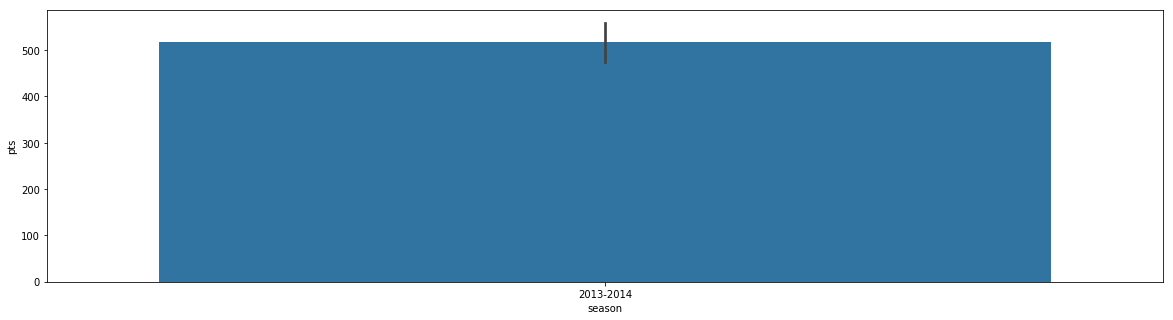

In [32]:
for i, col in enumerate(cat_cols):
    plt.figure(i,figsize = (20,5))
    sns.barplot(x = col,y ='pts', data=nba)

In [33]:
nba.corr().iloc[-2:-1,:]

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
pts,-0.01191,0.728462,0.810294,0.927464,0.992041,0.989211,0.257634,0.655342,0.672076,0.272773,...,0.505524,0.784675,0.72593,0.738295,0.797449,0.433549,0.912724,0.77806,1.0,NaN


In [34]:
print(nba.corr().iloc[-2:-1,:])

         age         g        gs        mp        fg       fga       fg.  \
pts -0.01191  0.728462  0.810294  0.927464  0.992041  0.989211  0.257634   

          x3p      x3pa      x3p.     ...           orb       drb      trb  \
pts  0.655342  0.672076  0.272773     ...      0.505524  0.784675  0.72593   

          ast       stl       blk       tov       pf  pts  season_end  
pts  0.738295  0.797449  0.433549  0.912724  0.77806  1.0         NaN  

[1 rows x 27 columns]


In [35]:
#identifying Features and Target Data seet
Feature_Coluumns=['age', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']


In [36]:
X=nba[Feature_Coluumns]
y=nba["pts"]

In [37]:
X.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,53,0.660,72,144,216,28,23,26,30,122
1,20,81,20,1197,93,185,0.503,0,0,0.000000,...,136,0.581,142,190,332,43,40,57,71,203
2,27,53,12,961,143,275,0.520,0,0,0.000000,...,119,0.639,102,204,306,38,24,36,39,108
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,336,0.815,32,230,262,248,35,3,146,136
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,67,0.836,94,183,277,40,23,46,63,187


In [38]:
y.head()

0     171
1     265
2     362
3    1330
4     328
Name: pts, dtype: int64

In [39]:
#Spliting the data set into training and testing data set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [42]:
# Predicting the Test set results
y_predict = regressor.predict(X_test)

In [43]:
#check the mean square value
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_predict)


In [44]:
print(mse)

8508.87140495868


In [45]:
#Evaluating the Algorithm
#For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 60.42314049586778
Mean Squared Error: 8508.87140495868
Root Mean Squared Error: 92.24354397440874


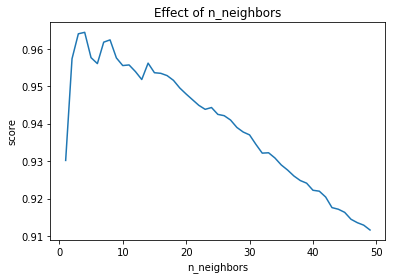

In [46]:
#changing the estimator to know at what point we get to the good RMSE
n = np.arange(1,50,1)
scores = []
for i in n:
    regressor = KNeighborsRegressor(n_neighbors=i)
    #regressor.set_params(n_neighbors=n)
    regressor.fit(X_train, y_train)
    #y_predict = regressor.predict(X_test)
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
    scores.append(regressor.score(X_test, y_test))
    #print(n)
plt.title("Effect of n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(n, scores)

In [47]:
(n, scores)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [0.930173161799163,
  0.9573113835064658,
  0.9639957808396812,
  0.9643868566557249,
  0.957627796713714,
  0.9560353248834779,
  0.9617630033666176,
  0.9623713020953448,
  0.9575505738026332,
  0.955512886475672,
  0.9556779917140175,
  0.9539084759152258,
  0.9517836517997983,
  0.956155953506609,
  0.9535996191511246,
  0.9534383244584591,
  0.952828984866064,
  0.9515621879257782,
  0.9495147598079312,
  0.9479035105124173,
  0.9463921176772822,
  0.9448900265079829,
  0.9438215832376822,
  0.9443026093423267,
  0.9424699649033752,
  0.9421247820735914,
  0.9409661222494295,
  0.9389862453821146,
  0.9377553125706141,
  0.9369957518939992,
  0.934466609269642,
  0.9321204046722641,
  0.9322177884697365,
  0.9308291506443948,
  0.9289661881208124,
  0.9276022529

In [ ]:
####  As per the above at n-neibhour =4, we are getting good accuracy

In [55]:
regressor = KNeighborsRegressor(n_neighbors=4)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

In [56]:
#Evaluating the Algorithm
#For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 56.789256198347104
Mean Squared Error: 7151.56714876033
Root Mean Squared Error: 84.56693886360279


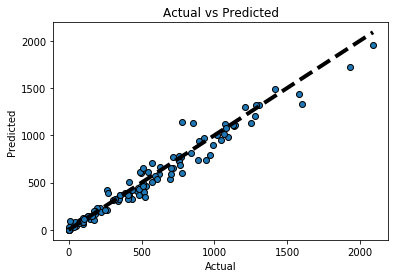

In [57]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()